# Predicting the Price of Bulldozer, given it's features.

 * This notebook aims at predicting the Price of Bulldozer using ML algorithm's.
 * Dataset URL : https://www.kaggle.com/c/bluebook-for-bulldozers/data
 * Evaluation Metrics used (root mean square log error or RMSLE)

## Steps to follow :
 1. Import the dataset & necessary pakages.
 2. Analysing & Manipulating the data.
 3. Choosing Estimator & Training on portion of data.
 4. Evaluating the Model.
 5. Hyperparameter tuning & training on all data.
 6. Saving the Model.
 7. Important Features 


 `NOTE`:Since this notebook is in reference to Kaggle Competetion, we will shape the output into required shape to upload to Kaggle.

### 1. Import Necessary packages & data

In [1]:
# Packages to be used.

#Data Analysis & Manipulating packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Spliting Data into 2 sets 
from sklearn.model_selection import train_test_split

#Model defining Packages
from sklearn.ensemble import RandomForestRegressor

#Evaluating packages
from sklearn.metrics import mean_absolute_error,mean_squared_log_error

#Tuning packages
from sklearn.model_selection import RandomizedSearchCV

#Save & Load Model
from joblib import dump,load

#Importing the dataset
data=pd.read_csv("drive/My Drive/Bull_dozer_dataset/TrainAndValid.csv",parse_dates=['saledate'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2. Data Analysis & Manipulation

In [2]:
data.head(),data.shape

(   SalesID  SalePrice  ...  Differential_Type  Steering_Controls
 0  1139246    66000.0  ...           Standard       Conventional
 1  1139248    57000.0  ...           Standard       Conventional
 2  1139249    10000.0  ...                NaN                NaN
 3  1139251    38500.0  ...                NaN                NaN
 4  1139253    11000.0  ...                NaN                NaN
 
 [5 rows x 53 columns], (412698, 53))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
#sort the rows a/c to saleyear
data.sort_values(by='saledate',inplace=True)

# separating year,month & day from saledate. It makes easier to discover trends and patters.
data['saleyear'] = data.saledate.dt.year
data['salemonth'] = data.saledate.dt.month
data['saleday'] = data.saledate.dt.day
data['saledayofweek'] = data.saledate.dt.dayofweek
data['saledayofyear'] = data.saledate.dt.dayofyear

#remove saledate col. as it is not required
data.drop('saledate',axis=1,inplace=True)

data.shape

(412698, 57)

In [5]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


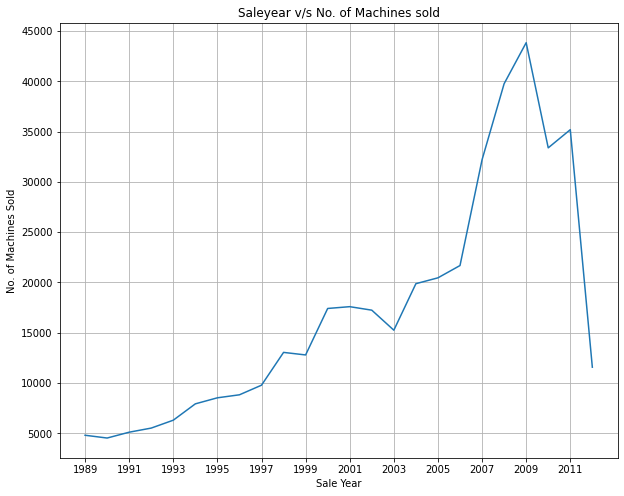

In [6]:
a=data.saleyear.value_counts()
a.sort_index(inplace=True)
plt.figure(figsize=(10,8))
plt.plot(a.index,a.values)
plt.xlabel("Sale Year")
plt.ylabel("No. of Machines Sold")
plt.title("Saleyear v/s No. of Machines sold")
plt.xticks(range(1989,2012,2))
plt.grid()
plt.show();

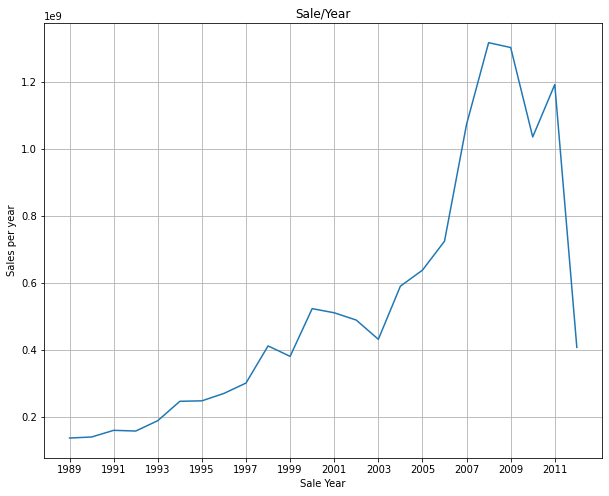

In [7]:
a=[]
for i in range(1989,2013):
  a.append((data['SalePrice'][data['saleyear']==i]).sum())
plt.figure(figsize=(10,8))
plt.plot(range(1989,2013),a)
plt.xlabel("Sale Year")
plt.ylabel("Sales per year")
plt.title("Sale/Year")
plt.xticks(range(1989,2012,2))
plt.grid()
plt.show();


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [9]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [10]:
#checking features with null values
for feature,content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if content.isna().sum():
      print("Numerical feature containing Null Value ",feature)
  elif pd.api.types.is_string_dtype(content):
    if content.isna().sum():
      print("Non-Nummerical feature containing Null Value ",feature)
  else:
    continue

Numerical feature containing Null Value  auctioneerID
Numerical feature containing Null Value  MachineHoursCurrentMeter
Non-Nummerical feature containing Null Value  UsageBand
Non-Nummerical feature containing Null Value  fiSecondaryDesc
Non-Nummerical feature containing Null Value  fiModelSeries
Non-Nummerical feature containing Null Value  fiModelDescriptor
Non-Nummerical feature containing Null Value  ProductSize
Non-Nummerical feature containing Null Value  Drive_System
Non-Nummerical feature containing Null Value  Enclosure
Non-Nummerical feature containing Null Value  Forks
Non-Nummerical feature containing Null Value  Pad_Type
Non-Nummerical feature containing Null Value  Ride_Control
Non-Nummerical feature containing Null Value  Stick
Non-Nummerical feature containing Null Value  Transmission
Non-Nummerical feature containing Null Value  Turbocharged
Non-Nummerical feature containing Null Value  Blade_Extension
Non-Nummerical feature containing Null Value  Blade_Width
Non-Numme

In [11]:
#Filling NULL values for Numerical Columns with median values
for feature,content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if content.isna().sum():
      data[feature+' ismissing']=content.isna()    #Add binary column to inidicate whether sample had missing value
      data[feature]=content.fillna(content.median())

In [12]:
data.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [13]:
data.shape

(412698, 59)

In [14]:
#Converting Non-Numeric columns into Numeric & filling null values 
for feature,content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    data[feature] = content.astype('category').cat.as_ordered()
    data[feature+' ismissing'] = content.isna()
    data[feature] = pd.Categorical(content).codes+1

In [15]:
data.dtypes

SalesID                          int64
SalePrice                      float64
MachineID                        int64
ModelID                          int64
datasource                       int64
                                ...   
Backhoe_Mounting ismissing        bool
Blade_Type ismissing              bool
Travel_Controls ismissing         bool
Differential_Type ismissing       bool
Steering_Controls ismissing       bool
Length: 103, dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls ismissing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 81.5 MB


In [17]:
# split into Independent & Dependent Var
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

#Validation set contais datas from 2012 only & rest is training data
X_train = X[:][X['saleyear'] != 2012]
X_val = X[:][X['saleyear'] == 2012]
y_train = data['SalePrice'][data['saleyear'] != 2012]
y_val = data['SalePrice'][data['saleyear'] == 2012]

len(X_train),len(X_val),len(y_train),len(y_val)

(401125, 11573, 401125, 11573)

In [18]:
#Test_data shape fed to the model must be of same dimenions as Training_data
#Processing test_data to maatch Training_data shape.
test_data = pd.read_csv("drive/My Drive/Bull_dozer_dataset/Test.csv",parse_dates=['saledate'])

# separating year,month & day from saledate. It makes easier to discover trends and patters.
test_data['saleyear'] = test_data.saledate.dt.year
test_data['salemonth'] = test_data.saledate.dt.month
test_data['saleday'] = test_data.saledate.dt.day
test_data['saledayofweek'] = test_data.saledate.dt.dayofweek
test_data['saledayofyear'] = test_data.saledate.dt.dayofyear 

#remove saledate col. as it is not required
test_data.drop('saledate',axis=1,inplace=True)

for feature,content in test_data.items():
  if pd.api.types.is_numeric_dtype(content):
    if content.isna().sum():
      test_data[feature+' ismissing']=content.isna()    #Add binary column to inidicate whether sample had missing value
      test_data[feature]=content.fillna(content.median())

for feature,content in test_data.items():
  if not pd.api.types.is_numeric_dtype(content):
    test_data[feature] = content.astype('category').cat.as_ordered()
    test_data[feature+' ismissing'] = content.isna()
    test_data[feature] = pd.Categorical(content).codes+1

set(data.columns)-set(test_data.columns)    #Indicates the missing columns in Test_data

{'SalePrice', 'auctioneerID ismissing'}

In [19]:
test_data['auctioneerID ismissing'] = False     #adding missing column in test_data to match training_data shape

### 3. Model Training


In [20]:
# Generate Baseline Model using default hyperparameters.
# Use only portion of data to ensure the model is working correctly.

%%time
rd_frst = RandomForestRegressor(n_jobs=-1,
                                random_state=42,
                                max_samples=10000)
rd_frst.fit(X_train,y_train)
print(rd_frst.score(X_val,y_val))
rd_frst.get_params()

'# Generate Baseline Model using default hyperparameters.\n# Use only portion of data to ensure the model is working correctly.\n\n%%time\nrd_frst = RandomForestRegressor(n_jobs=-1,\n                                random_state=42,\n                                max_samples=10000)\nrd_frst.fit(X_train,y_train)\nprint(rd_frst.score(X_val,y_val))\nrd_frst.get_params()'

### 4. Evaluating Model

In [21]:
# define a func which evaluates the model.

def evaluation_metrics(model):
  scores = {}
  scores['Accuracy (Training)']=model.score(X_train,y_train)
  scores['Accuracy (Validation)']=model.score(X_val,y_val)
  y_val_pred = model.predict(X_val)
  scores['MAE']=mean_absolute_error(y_val,y_val_pred)
  scores['MSLE']=mean_squared_log_error(y_val,y_val_pred)
  scores['RMSLE']=np.sqrt(scores['MSLE'])

  return scores

In [22]:
evaluation_metrics(rd_frst)

### 5. Hyperparameter Tuning

In [23]:
%%time
# Our base line model gave us pretty amazing results.
# Now tune hyperparameters to improve accuracy

np.random.seed(42)
grid ={'n_estimators':[90,120],
       'min_samples_split':[2,4,8],
       'min_samples_leaf':[1,10],
       'max_features':['auto',0.5],
       'max_samples':[10000],
      }

rd_srch = RandomizedSearchCV(rd_frst,
                             param_distributions=grid,
                             n_iter=20,
                             cv=5,
                             verbose=2)

rd_srch.fit(X_train,y_train)

"%%time\n# Our base line model gave us pretty amazing results.\n# Now tune hyperparameters to improve accuracy\n\nnp.random.seed(42)\ngrid ={'n_estimators':[90,120],\n       'min_samples_split':[2,4,8],\n       'min_samples_leaf':[1,10],\n       'max_features':['auto',0.5],\n       'max_samples':[10000],\n      }\n\nrd_srch = RandomizedSearchCV(rd_frst,\n                             param_distributions=grid,\n                             n_iter=20,\n                             cv=5,\n                             verbose=2)\n\nrd_srch.fit(X_train,y_train)"

In [24]:
rd_srch.best_params_

In [25]:
evaluation_metrics(rd_srch)

In [ ]:
%%time
#use those parameters to train our ideal model
rd_frst = RandomForestRegressor(min_samples_leaf= 1,
                                min_samples_split= 2,
                                n_estimators= 120,
                                max_samples=None,
                                n_jobs=-1,
                                random_state=42,
                                verbose=2)

rd_frst.fit(X_train,y_train)

In [27]:
evaluation_metrics(rd_frst)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:   11.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.4s finished


{'Accuracy (Training)': 0.9876134493333316,
 'Accuracy (Validation)': 0.873065369113553,
 'MAE': 6113.538262190732,
 'MSLE': 0.06505385814156812,
 'RMSLE': 0.25505657831463224}

### 6. Saving & Loading Model

In [28]:
#Saving the Model 
dump(rd_frst,filename="drive/My Drive/Bull_dozer_dataset/Model.joblib")

['drive/My Drive/Bull_dozer_dataset/Model.joblib']

In [29]:
# Output should be of format mentioned by kaggle
loaded_model = load(filename='drive/My Drive/Bull_dozer_dataset/Model.joblib')
pred_test = loaded_model.predict(test_data)
output_df=pd.DataFrame({'SaleID':test_data['SalesID'],
                 'SalePrice':pred_test})
output_df

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.3s finished


,SaleID,SalePrice
0,1227829,20763.750000
1,1227844,23324.166667
2,1227847,47825.000000
3,1227848,81741.666667
4,1227863,44890.833333
...,...,...
12452,6643171,58562.500000
12453,6643173,11487.500000
12454,6643184,12199.583333
12455,6643186,17752.500000


### 7. Important Features

In [30]:
imp_features = loaded_model.feature_importances_

In [31]:
def plot_features(columns,imp_features,n=20):
  df=(pd.DataFrame({'features':columns,
                   'imp_features':imp_features,}).sort_values('imp_features',ascending=False).reset_index(drop=True))
  sns.barplot(x='imp_features',
              y='features',
              data=df[:n],
              orient='h')
  


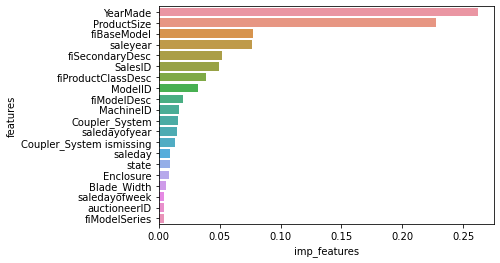

In [32]:
plot_features(X_train.columns,imp_features)

#### To further enhance the model's accuracy, we could use only important features in training the model.This will avoid unecessary noise & model will be more accurate.